In [1]:
!pip install opendatasets

In [2]:
!pip install Pillow


In [3]:
import opendatasets as od
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import torchvision.transforms as transforms

import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os # accessing directory structure
import torchvision.datasets as datasets

from torch.utils.data import  random_split, DataLoader
import torch
import torchvision
import keras



In [4]:
dataset_link = "https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: carlososmar
Your Kaggle Key: ··········


100%|██████████| 565M/565M [00:16<00:00, 35.2MB/s]


In [5]:
DATASET_PATH = "/content/fashion-product-images-small/myntradataset/"
print(os.listdir(DATASET_PATH))

['styles.csv', 'images']


In [35]:
'''CONVIERTE LAS IMAGENES DE COLORES A BLANCO Y NEGRO'''

from PIL import Image
import os

input_directory = "/content/fashion-product-images-small/images"


output_directory = "/content/fashion-product-images-small/myntradataset/images_1"


if not os.path.exists(output_directory):
    os.makedirs(output_directory)


image_files = os.listdir(input_directory)


for image_file in image_files:

    image_path = os.path.join(input_directory, image_file)
    image = Image.open(image_path)


    image_bw = image.convert("L")


    output_path = os.path.join(output_directory, image_file)
    image_bw.save(output_path)

print("Conversion completa.")


Conversion completa.


In [36]:
'''crea la columna image'''
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=8000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)


<ipython-input-36-eb8d681642cd>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=8000, error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11



,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,59067,Women,Apparel,Innerwear,Bra,Black,Summer,2017,Casual,Peri Peri Women Black Bra,59067.jpg
1,2219,Men,Footwear,Shoes,Casual Shoes,Black,Fall,2010,Casual,ADIDAS Men's Black Shoe,2219.jpg
2,14693,Men,Apparel,Bottomwear,Trousers,Black,Fall,2011,Casual,Basics Men Black Trousers,14693.jpg
3,52043,Unisex,Apparel,Topwear,Rain Jacket,Navy Blue,Summer,2012,NaN,Just Natural Unisex Navy Blue Jacket,52043.jpg
4,22848,Men,Footwear,Shoes,Casual Shoes,Khaki,Summer,2016,Casual,Woodland Men Khaki Casual Shoes,22848.jpg
5,49050,Women,Accessories,Jewellery,Ring,Silver,Summer,2013,Casual,Lucera Women Silver Ring,49050.jpg
6,49981,Men,Apparel,Innerwear,Innerwear Vests,Khaki,Summer,2016,Casual,Hanes Men Khaki Innerwear Vest,49981.jpg
7,25587,Women,Apparel,Apparel Set,Kurta Sets,Black,Fall,2011,Ethnic,Vishudh Women Black & Purple Printed Churidar ...,25587.jpg
8,33283,Boys,Apparel,Bottomwear,Jeans,Black,Summer,2012,Casual,Gini and Jony Boys Black Jeans,33283.jpg
9,18898,Women,Apparel,Topwear,Shirts,White,Fall,2011,Casual,Arrow Woman Solid White Shirt,18898.jpg


In [37]:
df['gender'].unique()
# df['season'].info

array(['Women', 'Men', 'Unisex', 'Boys', 'Girls'], dtype=object)

In [38]:
'''CREAR CARPETAS CON EL NOMBRE DEL LABEL Y DE CONTENIDO SUS REPECTIVAS IMAGENES'''

import pandas as pd
import os
import shutil

data = df


labels = data['gender'].unique()


dataset_folder = 'dataset'
os.makedirs(dataset_folder, exist_ok=True)


for label in labels:
    label_folder = os.path.join(dataset_folder, label)
    os.makedirs(label_folder, exist_ok=True)


for index, row in data.iterrows():
    image_name = row['image']
    label = row['gender']
    source_image_path = os.path.join('/content/fashion-product-images-small/myntradataset/images_1', image_name)
    destination_folder = os.path.join(dataset_folder, label)
    destination_image_path = os.path.join(destination_folder, image_name)

    try:
        # Intenta copiar la imagen
        shutil.copy(source_image_path, destination_image_path)

    except FileNotFoundError:

        print(f"La imagen {image_name} no existe en la ubicación de origen.")
    except Exception as e:

        print(f"Error al copiar la imagen {image_name}: {str(e)}")

print("Estructura de carpetas creada exitosamente.")

La imagen 39403.jpg no existe en la ubicación de origen.
Estructura de carpetas creada exitosamente.


In [39]:
dataset_dir = "/content/dataset"
transform = transforms.Compose([
    transforms.Resize((60, 60)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5), std=(0.5))
])

In [40]:
dataset = datasets.ImageFolder(root= dataset_dir, transform = transform)

In [41]:
# dimenciones de un dato
indice = 0
imagen, etiqueta = dataset[indice]

dimensiones = imagen.shape
print("Dimensiones de la imagen:", dimensiones)

Dimensiones de la imagen: torch.Size([1, 60, 60])


In [42]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [43]:
import numpy as np

class Dataset(torch.utils.data.Dataset):
  def __init__(self, trainset):
    self.imgs = torch.tensor([np.array(i[0]).flatten() / 255. for i in trainset], dtype=torch.float, device=device)
    self.imgs = self.imgs * 2. - 1.
    self.labels = torch.tensor([i[1] for i in trainset], dtype=torch.long, device=device)

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, ix):
    return self.imgs[ix], self.labels[ix]

train = Dataset(dataset)
len(train)

7999

In [44]:
dataloader = DataLoader(train, batch_size=32, shuffle= True)
imgs, labels = next(iter(dataloader))
# imgs.shape, labels.shape
classes = dataset.classes

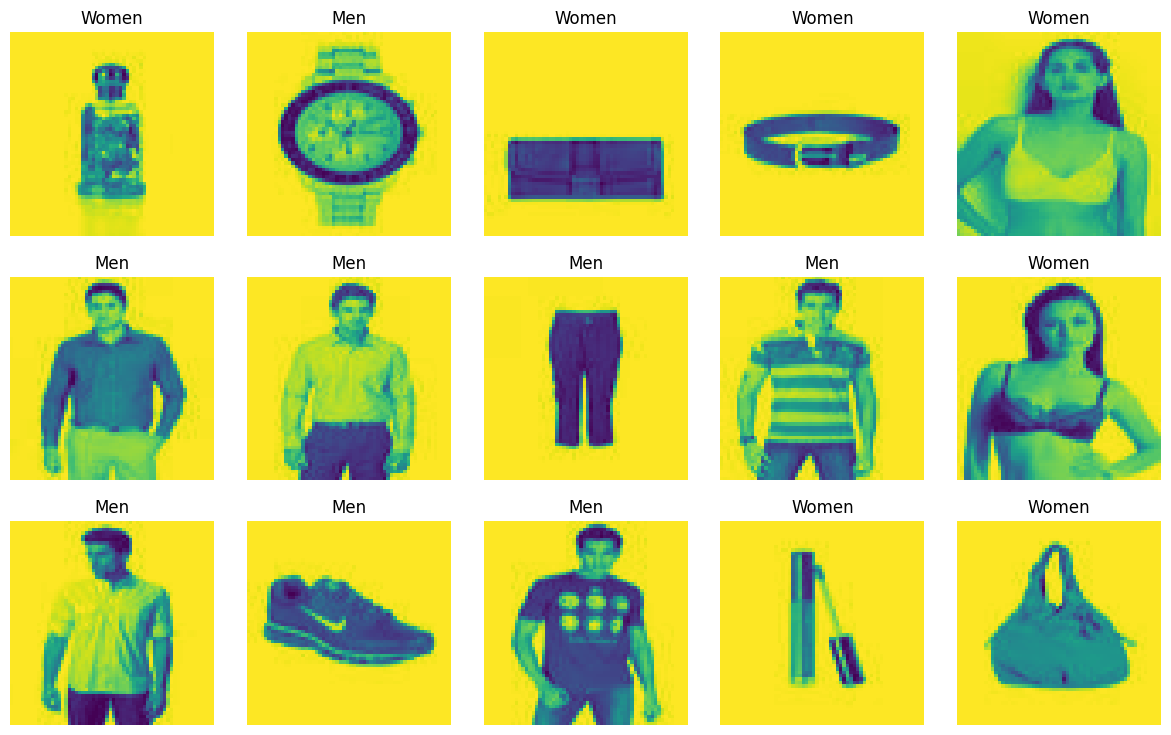

In [45]:
import random
import matplotlib.pyplot as plt

r, c = 3, 5
plt.figure(figsize=(c*3, r*3))
for row in range(r):
    for col in range(c):
        index = c*row + col
        plt.subplot(r, c, index + 1)
        ix = random.randint(0, len(train)-1)
        img, label = train[ix]
        plt.imshow(img.reshape(60,60).cpu())
        plt.axis('off')
        plt.title(classes[label.item()])
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

In [46]:
from fastprogress import master_bar, progress_bar

def fit(g, d, dataloader, epochs=30, crit=None):
  g.to(device)
  d.to(device)
  g_optimizer = torch.optim.Adam(g.parameters(), lr=3e-4)
  d_optimizer = torch.optim.Adam(d.parameters(), lr=3e-4)
  crit = nn.BCEWithLogitsLoss() if crit == None else crit
  g_loss, d_loss = [], []
  mb = master_bar(range(1, epochs+1))
  hist = {'g_loss': [], 'd_loss': []}
  for epoch in mb:

    for X, y in progress_bar(dataloader, parent=mb):
      #X, y = X.to(device), y.to(device)
      # entrenamos el discriminador
      g.eval()
      d.train()
      #   generamos un batch de imágenes falsas
      noise = torch.randn((X.size(0), g.input_size)).to(device)
      genenerated_images = g(noise)
      #   input del discrminator
      d_input = torch.cat([genenerated_images, X.view(X.size(0), -1)])
      #   gorund truth para el discriminator
      d_gt = torch.cat([torch.zeros(X.size(0)), torch.ones(X.size(0))]).view(-1,1).to(device)
      #   optimización
      d_optimizer.zero_grad()
      d_output = d(d_input)
      d_l = crit(d_output, d_gt)
      d_l.backward()
      d_optimizer.step()
      d_loss.append(d_l.item())
      # entrenamos el generador
      g.train()
      d.eval()
      #   generamos un batch de imágenes falsas
      noise = torch.randn((X.size(0), g.input_size)).to(device)
      genenerated_images = g(noise)
      #   salidas del discriminador
      d_output = d(genenerated_images)
      #   gorund truth para el generator
      g_gt = torch.ones(X.size(0)).view(-1,1).to(device)
      #   optimización
      g_optimizer.zero_grad()
      g_l = crit(d_output, g_gt)
      g_l.backward()
      g_optimizer.step()
      g_loss.append(g_l.item())
      # logs
      mb.child.comment = f'g_loss {np.mean(g_loss):.5f} d_loss {np.mean(d_loss):.5f}'
    mb.write(f'Epoch {epoch}/{epochs} g_loss {np.mean(g_loss):.5f} d_loss {np.mean(d_loss):.5f}')
    hist['g_loss'].append(np.mean(g_loss))
    hist['d_loss'].append(np.mean(d_loss))
  return hist

In [47]:
import torch.nn as nn
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_size = 100
    self.inp = nn.Sequential(
        nn.Linear(self.input_size,  15*15*256),
        nn.BatchNorm1d(15*15*256),
    )
    self.main = nn.Sequential(
        nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        nn.ConvTranspose2d(128, 1, 4, stride=2, padding=1, bias=False),
        nn.Tanh()
    )

  def forward(self, x):
    x = self.inp(x)
    x = x.view(-1, 256, 15, 15)
    x = self.main(x)
    x = x.view(x.size(0), 60*60)
    return x

In [19]:
generator = Generator()
output = generator(torch.randn(64, 150))
output.shape

torch.Size([64, 3600])

In [48]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.main = nn.Sequential(
        nn.Conv2d(1, 64, 4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(True),
        nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(True)
    )
    self.out = nn.Sequential(
        nn.Linear(128*15*15, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    # esperamos vectores a la entrada de 60*60
    x = x.view(x.size(0), 1, 60, 60)
    x = self.main(x)
    x = x.view(x.size(0), -1)
    x = self.out(x)
    return x

In [49]:
discriminator = Discriminator()
output = discriminator(torch.randn(64, 60*60))
output.shape

torch.Size([64, 1])

In [50]:
hist = fit(generator, discriminator, dataloader, crit=torch.nn.BCELoss())

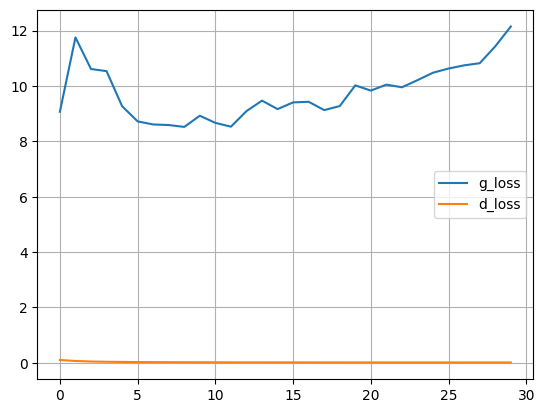

In [51]:
df = pd.DataFrame(hist)
df.plot(grid=True)
plt.show()

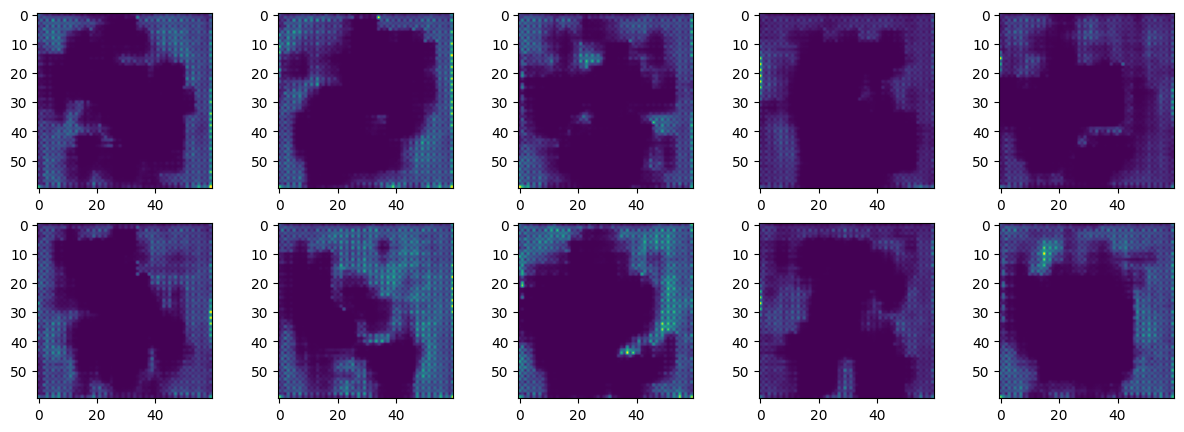

In [52]:
generator.eval()
with torch.no_grad():
  noise = torch.randn((10, generator.input_size)).to(device)
  generated_images = generator(noise)
  fig, axs = plt.subplots(2,5,figsize=(15,5))
  i = 0
  for ax in axs:
    for _ax in ax:
      img = generated_images[i].view(60,60).cpu()
      _ax.imshow(img)
      i+=1
  plt.show()